Here we will be using house sales price data and will try to predict house prices based upon different features like sqft_living bedrooms lot size and much more , so let's get started <br><br>
## Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Now we will be loading main dataset and will be exploring that , will try to deal with different features . Later we will load train data to train/fit our regression model and test data to test model

In [2]:
data = pd.read_csv("kc_house_data.csv")

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 
              'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 
              'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 
              'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [5]:
for col,dt in dtype_dict.items():
    data[col] = data[col].astype(dt)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  object 
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  float64
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  float64
 6   sqft_lot       21613 non-null  int32  
 7   floors         21613 non-null  object 
 8   waterfront     21613 non-null  int32  
 9   view           21613 non-null  int32  
 10  condition      21613 non-null  int32  
 11  grade          21613 non-null  int32  
 12  sqft_above     21613 non-null  int32  
 13  sqft_basement  21613 non-null  int32  
 14  yr_built       21613 non-null  int32  
 15  yr_renovated   21613 non-null  int32  
 16  zipcode        21613 non-null  object 
 17  lat            21613 non-null  float64
 18  long  

In [7]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

so basically our dataset has no missing value so let's get some summary statistics 

In [8]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
data.waterfront.value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

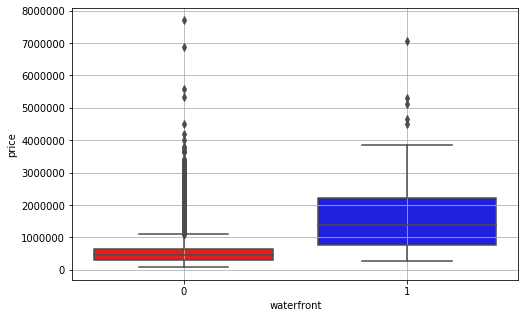

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(x = 'waterfront' , y = 'price' , data=data , palette =['red' , 'blue'])
plt.grid(True)


This boxplot represents that there's a significant change if house is waterfront , houses having waterfront are sold for very high price on average

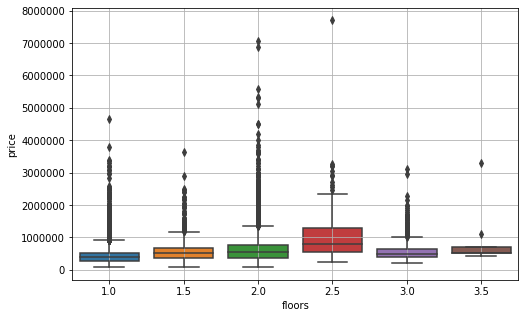

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(x = 'floors' , y = 'price' , data=data )
plt.grid(True)
# we can see that house price are not much influenced by no of floors that house has , although it increses with the increasing no of floor

In [12]:
data.condition.unique()

array([3, 5, 4, 1, 2])

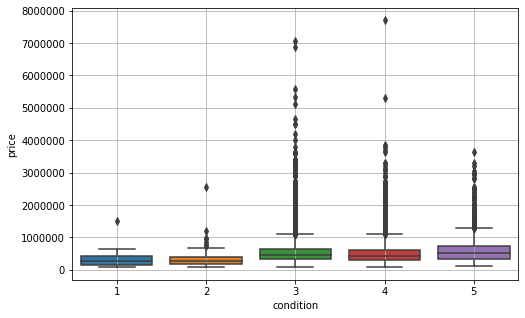

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(x = 'condition' , y = 'price' , data=data )
plt.grid(True)#conditon effects house price

In [14]:
data.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

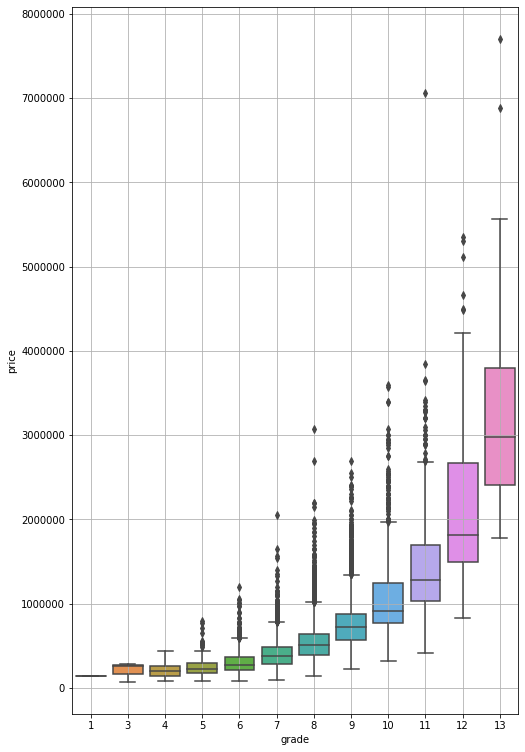

In [15]:
plt.figure(figsize=(8,13))
sns.boxplot(x = 'grade' , y = 'price' , data=data )
plt.grid(True)

this plot shows that there is drastic change in house price with the increasing no of grade for the house

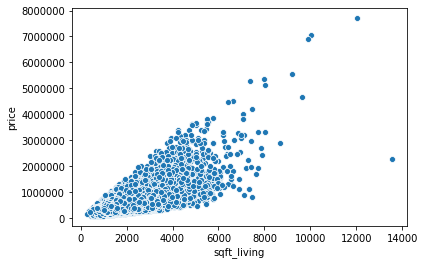

In [16]:
sns.scatterplot(x='sqft_living' , y = 'price' ,data=data)

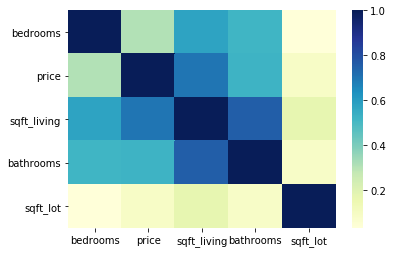

In [17]:
sns.heatmap(data[['bedrooms' , 'price' , 'sqft_living' , 'bathrooms', 'sqft_lot']].corr() ,cmap="YlGnBu" )

Although we often think of multiple regression as including multiple different features (e.g. # of bedrooms, square feet, and # of bathrooms) but we can also consider transformations of existing variables e.g. the log of the square feet or even "interaction" variables such as the product of bedrooms and bathrooms.

#### Add 4 new variables in both your train_data and test_data. 

- ‘bedrooms_squared’ = ‘bedrooms’*‘bedrooms’
- ‘bed_bath_rooms’ = ‘bedrooms’*‘bathrooms’
- ‘log_sqft_living’ = log(‘sqft_living’)
- ‘lat_plus_long’ =  ‘lat’ + ‘long’
Before we continue let’s explain these new variables:

Squaring bedrooms will increase the separation between not many bedrooms (e.g. 1) and lots of bedrooms (e.g. 4) since 1^2 = 1 but 4^2 = 16. Consequently this variable will mostly affect houses with many bedrooms.
Bedrooms times bathrooms is what's called an "interaction" variable. It is large when both of them are large.
Taking the log of square feet has the effect of bringing large values closer together and spreading out small values.
Adding latitude to longitude is non-sensical but we will do it anyway (you'll see why)
	For those students not using SFrames you should first download and import the training and testing data sets provided and then add the four new variables each to both data sets (training and testing)

In [18]:
train_data = pd.read_csv("kc_house_train_data.csv")
test_data = pd.read_csv("kc_house_test_data.csv")

In [19]:
train_data['bedrooms_squared'] =train_data.bedrooms**2
train_data['bed_bath_rooms'] = train_data.bedrooms*train_data.bathrooms
train_data['log_sqft_living'] = np.log(train_data.sqft_living)
train_data['lat_plus_long'] = train_data.lat + train_data.long

In [20]:
train_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'bedrooms_squared',
       'bed_bath_rooms', 'log_sqft_living', 'lat_plus_long'],
      dtype='object')

In [21]:
test_data['bedrooms_squared'] =test_data.bedrooms**2
test_data['bed_bath_rooms'] = test_data.bedrooms*test_data.bathrooms
test_data['log_sqft_living'] = np.log(test_data.sqft_living)
test_data['lat_plus_long'] = test_data.lat + test_data.long

In [22]:
test_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'bedrooms_squared',
       'bed_bath_rooms', 'log_sqft_living', 'lat_plus_long'],
      dtype='object')

##### Quiz Question: what are the mean (arithmetic average) values of your 4 new variables on TEST data? (round to 2 digits)

In [23]:
np.set_printoptions(precision=3)

In [24]:
%precision 2
print("bedrooms_square_mean : ", test_data['bedrooms_squared'].mean())
print("bed_bath_rooms_mean : ", test_data['bed_bath_rooms'].mean())
print("log_sqft_living_mean : ", test_data['log_sqft_living'].mean())
print("lat_plus_long_mean : ", test_data['lat_plus_long'].mean())

bedrooms_square_mean :  12.4466777015843
bed_bath_rooms_mean :  7.5039016315913925
log_sqft_living_mean :  7.550274679645921
lat_plus_long_mean :  -74.65333355403185


#### Let's import regression model from sklearn

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
reg1 = LinearRegression()
reg2 = LinearRegression()
reg3 = LinearRegression()

. Use `turicreate.linear_regression.create()` (or any other regression library/function) to estimate the regression coefficients/weights for predicting ‘price’ for the following three models:(In all 3 models include an intercept -- most software does this by default).

- Model 1: ‘sqft_living’, ‘bedrooms’, ‘bathrooms’, ‘lat’, and ‘long’
- Model 2: ‘sqft_living’, ‘bedrooms’, ‘bathrooms’, ‘lat’,‘long’, and ‘bed_bath_rooms’
- Model 3: ‘sqft_living’, ‘bedrooms’, ‘bathrooms’, ‘lat’,‘long’, ‘bed_bath_rooms’, ‘bedrooms_squared’, ‘log_sqft_living’, and ‘lat_plus_long’
You’ll note that the three models here are “nested” in that all of the features of the Model 1 are in Model 2 and all of the features of Model 2 are in Model 3.  

If you use `turicreate.linear_regression.create()` to estimate these models please ensure that you set validation_set = None. This way you will get the same answer every time you run the code.

Learn all three models on the TRAINING data set. Save your model results for quiz questions later.

In [27]:
model1 = reg1.fit(train_data[['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long']] ,train_data['price'] )
model1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
model1.score(test_data[['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long']] , test_data['price'])

0.5801585583483893

#### Quiz Question: What is the sign (positive or negative) for the coefficient/weight for ‘bathrooms’ in Model 1?

In [29]:
model1.coef_[2]

15706.742082734634

In [30]:
from sklearn.metrics import mean_squared_error as mse
mse(train_data['price'], model1.predict(train_data[['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long']]))

55676481997.78795

In [31]:
from sklearn.metrics import mean_squared_error as mse
mse(test_data['price'], model1.predict(test_data[['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long']]))

53322409504.72697

In [32]:
55676481997.78795 - 0

55676481997.79

In [33]:
model2 = reg2.fit(train_data[['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long','bed_bath_rooms']] ,train_data['price'] )
model2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
model2.score(test_data[['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long','bed_bath_rooms']] , test_data['price'])

0.5841112163820648

#### Quiz Question: What is the sign (positive or negative) for the coefficient/weight for ‘bathrooms’ in Model 2?

In [35]:
model2.coef_[2]

-71461.30829275966

In [36]:
from sklearn.metrics import mean_squared_error as mse
mse(train_data['price'], model2.predict(train_data[['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long','bed_bath_rooms']]))

55132284576.28106

In [37]:
from sklearn.metrics import mean_squared_error as mse
mse(test_data['price'], model2.predict(test_data[['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long','bed_bath_rooms']]))

52820397960.857765

In [38]:
model3 = reg3.fit(train_data[['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long','bedrooms_squared','log_sqft_living','lat_plus_long']] ,train_data['price'] )
model3

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
from sklearn.metrics import mean_squared_error as mse
mse(train_data['price'], model3.predict(train_data[['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long','bedrooms_squared','log_sqft_living','lat_plus_long']]))

51996359140.47557

In [40]:
from sklearn.metrics import mean_squared_error as mse
mse(test_data['price'], model3.predict(test_data[['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long','bedrooms_squared','log_sqft_living','lat_plus_long']]))

70450578508.07019

In [41]:
model3.score(test_data[['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long','bedrooms_squared','log_sqft_living','lat_plus_long']] , test_data['price'])

0.4452975264856305

In [42]:
70450578508.07019 - 52820397960.857765

17630180547.21

In [43]:
53322409504.72697-52820397960.857765

502011543.87